# Speech To Text

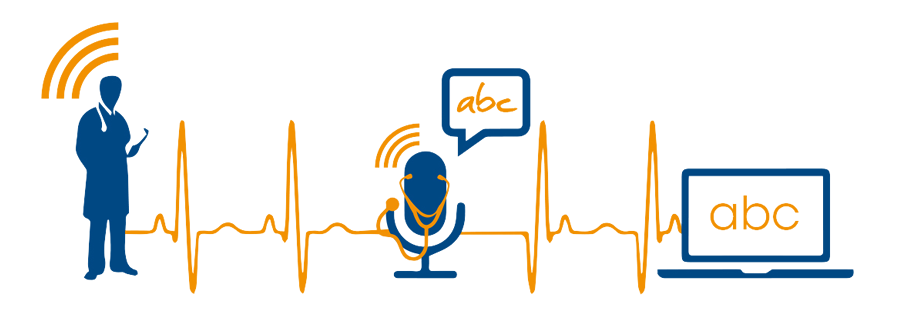

Transcribed Text: good evening ladies and gentlemen we like to welcome you to play the new videos Broadcast

Total number of words: 16

Word frequencies:
to: 2
good: 1
evening: 1
ladies: 1
and: 1
gentlemen: 1
we: 1
like: 1
welcome: 1
you: 1


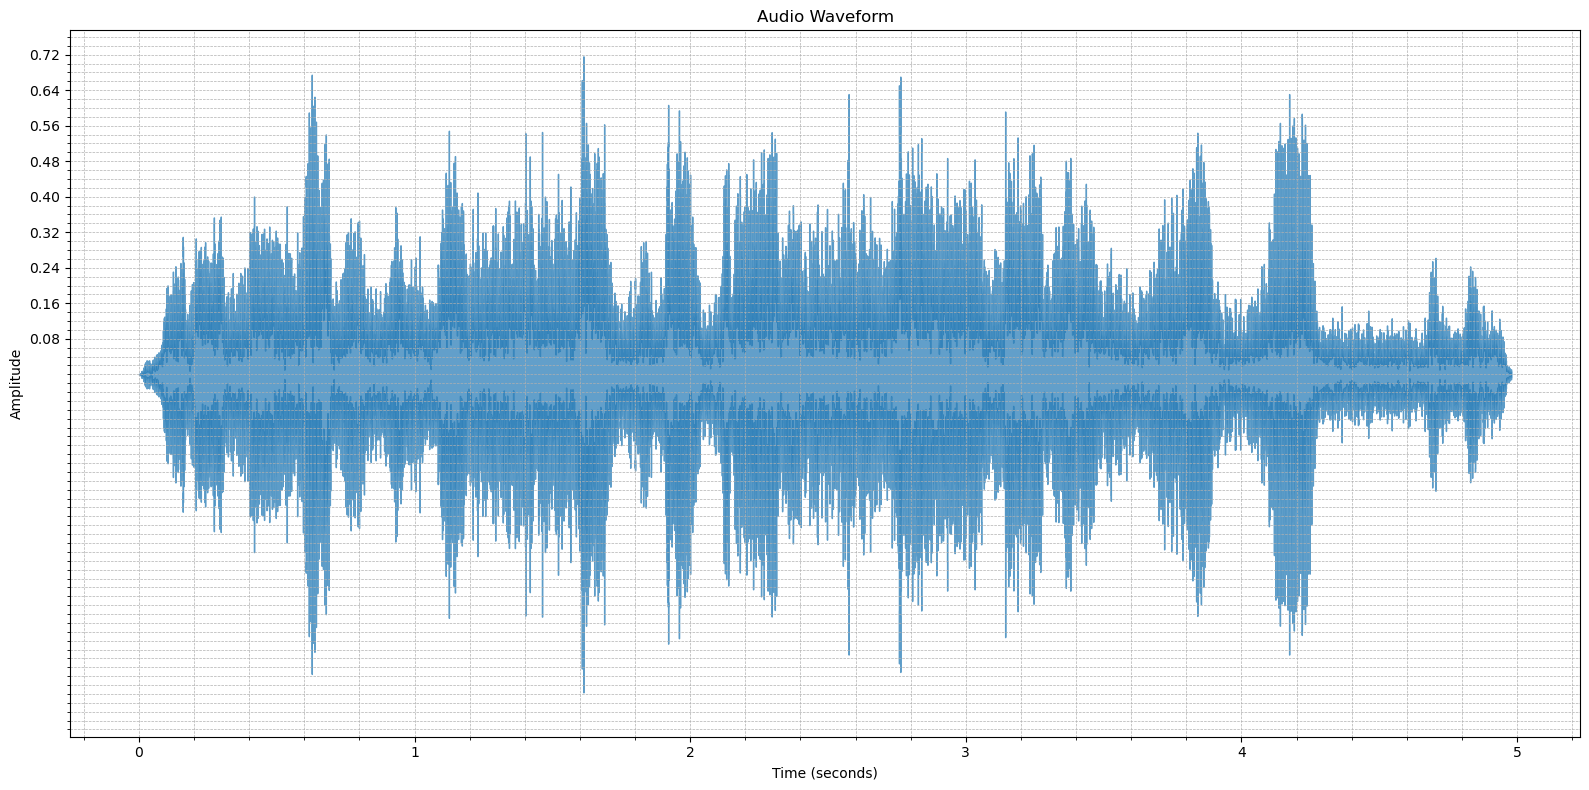

In [26]:
import speech_recognition as sr
from pydub import AudioSegment
from collections import Counter
import re
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def audio_to_text(audio_file_path):
    # Convert audio file to WAV format if it's not already
    if not audio_file_path.endswith('.wav'):
        audio = AudioSegment.from_file(audio_file_path)
        audio_file_path = "converted_audio.wav"
        audio.export(audio_file_path, format="wav")
    
    # Initialize recognizer
    recognizer = sr.Recognizer()
    
    # Load the audio file
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)
    
    # Recognize (convert from speech to text)
    try:
        text = recognizer.recognize_google(audio_data)
        return text
    except sr.UnknownValueError:
        return "Google Speech Recognition could not understand the audio"
    except sr.RequestError as e:
        return f"Could not request results from Google Speech Recognition service; {e}"

def calculate_word_stats(text):
    # Convert to lowercase and remove punctuation
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Split into words
    words = text.split()

    # Count total words
    total_words = len(words)

    # Count word occurrences
    word_counts = Counter(words)

    # Sort by frequency in descending order
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    return total_words, sorted_words

def plot_waveform(audio_file_path, y_axis_step=0.08, y_axis_start=0, buffer=0.1, figsize=(16, 8)):
    # Load the audio file
    y, sr = librosa.load(audio_file_path)

    # Calculate the duration
    duration = librosa.get_duration(y=y, sr=sr)

    # Calculate normalized amplitude range
    min_amp = np.min(y)
    max_amp = np.max(y)
    normalized_range = max_amp - min_amp

    # Create custom Y-axis labels starting after y_axis_start
    y_axis_labels = np.arange(y_axis_start + y_axis_step, max_amp + y_axis_step, y_axis_step)

    # Calculate the time axis with 1-second intervals
    time = librosa.frames_to_time(np.arange(0, len(y)), sr=sr)

    # Plot the waveform
    plt.figure(figsize=figsize)
    librosa.display.waveshow(y, sr=sr, alpha=0.7)

    # Set major and minor ticks for X-axis (seconds)
    plt.xticks(np.arange(0, duration + 1, 1))  # Major ticks every second
    plt.minorticks_on()
    plt.grid(which='both', linestyle='--', linewidth=0.5)

    # Set custom Y-axis labels and adjusted limits
    plt.yticks(y_axis_labels)
    plt.ylim(min_amp - buffer, max_amp + buffer)

    plt.title('Audio Waveform')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

# Example usage
audio_file_path = "C:\\Users\\SHUBHAM\\Desktop\\Sports.wav"  # Replace with the path to your audio file
text = audio_to_text(audio_file_path)
print("Transcribed Text:", text)

if not isinstance(text, str) or text.startswith("Google Speech Recognition could not understand"):
    print("Error in transcription. Cannot calculate word statistics.")
else:
    total_words, word_frequencies = calculate_word_stats(text)
    print(f"\nTotal number of words: {total_words}")
    print("\nWord frequencies:")
    for word, count in word_frequencies[:10]:  # Showing top 10 words for brevity
        print(f"{word}: {count}")

# Plot the waveform
plot_waveform(audio_file_path)